In [1]:
import os
import sys
import argparse
import datetime as dt
from pathlib import Path
from matplotlib import pyplot as plt

ROOT_PATH = Path(os.path.dirname(os.path.abspath('')))

In [2]:
dataset = 'MLM_v1'
task = 'mtl'
# read log file lines
with open(f'{str(ROOT_PATH)}/experiments/results/{dataset}/{task}/train.log') as f:
    lines = [line.rstrip() for line in f]

In [3]:
# extract loss for each epoch and values for each epoch
values = {
    'Epoch Time': [],
    'Val IR Median Rank': [],
    'Val IR Recall': [],
    'Val LE Image': [],
    'Val LE Text': []
}

for line in lines:
    l_list = line.split()

    if 'Val Loss' in line:
        values['Epoch Time'].append(dt.datetime.strptime(f'{l_list[0]} {l_list[1]} {l_list[2]}', '%d/%m/%Y %H:%M:%S %p'))

    if 'Val IR Median Rank' in line:
        values['Val IR Median Rank'].append(float(l_list[-1]))

    if 'Val IR Recall' in line:
        values['Val IR Recall'].append([float(l_list[11]), float(l_list[14]), float(l_list[17])])

    if 'Val LE Image' in line:
        values['Val LE Image'].append([float(l_list[11]), float(l_list[14]), float(l_list[17]), float(l_list[21])])

    if 'Val LE Text' in line:
        values['Val LE Text'].append([float(l_list[11]), float(l_list[14]), float(l_list[17]), float(l_list[21])])

In [4]:
# average epoch time
diff_time = []
for i, time in enumerate(values["Epoch Time"]):
    if i != 0:
        diff = float((time-values["Epoch Time"][i-1]).seconds / 60)
        if diff > 120:
            diff_time.append(sum(diff_time)/len(diff_time))
        else:
            diff_time.append(diff)
print(f'Average Epoch Time: {sum(diff_time)/len(diff_time):.2f} minutes')

Average Epoch Time: 61.46 minutes


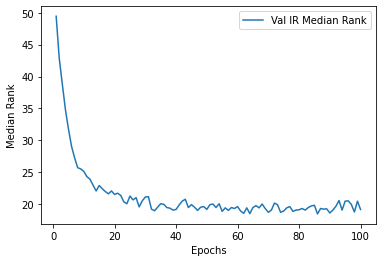

In [5]:
if values['Val IR Median Rank']:
    plt.plot(range(1,101), values['Val IR Median Rank'], label='Val IR Median Rank')
    plt.xlabel('Epochs')
    plt.ylabel('Median Rank')
    plt.legend()
    plt.show()

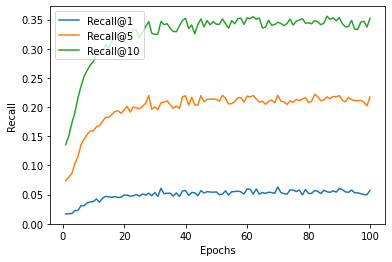

In [6]:
if values['Val IR Recall']:
    plt.plot(range(1,101), [v[0] for v in values['Val IR Recall']], label='Recall@1')
    plt.plot(range(1,101), [v[1] for v in values['Val IR Recall']], label='Recall@5')
    plt.plot(range(1,101), [v[2] for v in values['Val IR Recall']], label='Recall@10')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

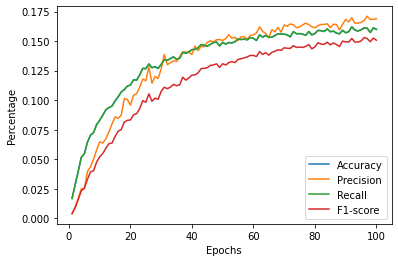

In [7]:
if values['Val LE Image']:
    plt.plot(range(1,101), [v[0] for v in values['Val LE Image']], label='Accuracy')
    plt.plot(range(1,101), [v[1] for v in values['Val LE Image']], label='Precision')
    plt.plot(range(1,101), [v[2] for v in values['Val LE Image']], label='Recall')
    plt.plot(range(1,101), [v[3] for v in values['Val LE Image']], label='F1-score')
    plt.xlabel('Epochs')
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()

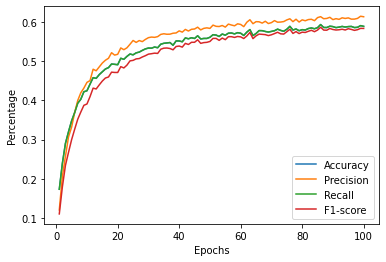

In [8]:
if values['Val LE Text']:
    plt.plot(range(1,101), [v[0] for v in values['Val LE Text']], label='Accuracy')
    plt.plot(range(1,101), [v[1] for v in values['Val LE Text']], label='Precision')
    plt.plot(range(1,101), [v[2] for v in values['Val LE Text']], label='Recall')
    plt.plot(range(1,101), [v[3] for v in values['Val LE Text']], label='F1-score')
    plt.xlabel('Epochs')
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()